# Heart Failure Prediction - Solution


<div>
<img src="https://images.news18.com/ibnlive/uploads/2022/01/heart-health-16430292854x3.jpg" width="200"/>
</div>

# About Dataset

# Introduction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.



### Attribute Information
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

*Angina*: A type of chest pain caused by reduced blood flow to the heart.
Angina is a symptom of coronary artery disease.
Angina feels like squeezing, pressure, heaviness, tightness or pain in the chest. It can be sudden or recur over time.

### Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

In [13]:
import pandas as pd
import numpy as np

### reading the data

In [14]:
# reading the csv files
heart = pd.read_csv("heart.csv")

In [15]:
print("Shape of heart data:", heart.shape)

Shape of heart data: (918, 12)


In [16]:
# listing out the columns 
list_of_columns = heart.columns
print("Number of Columns:", len(list_of_columns))
print("Columns:", list_of_columns)

Number of Columns: 12
Columns: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [17]:
# printing out the first five records
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [18]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Exploratory Data Analysis

In [19]:
# missing values
heart.isnull().sum().sort_values(ascending=False)/len(heart)

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [20]:
heart['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [21]:
heart['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### Preprocessing

In [22]:
heart_labels = heart['HeartDisease']
heart = heart.drop('HeartDisease', axis=1)

In [23]:
heart['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

* We are not dropping `FastingBS` because it is already preprocced column. if FastingBS > 120 then result is 1 and FastingBS < 120 then resut is 0. 

In [24]:
all_data = pd.concat([heart], axis=0)

In [25]:
print("Shape of all_data:", all_data.shape)
print("Columns in all_data:", all_data.columns)

Shape of all_data: (918, 11)
Columns in all_data: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [26]:
all_data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up


In [27]:
cat_cols = ['Sex', "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [28]:
# label encoding
for column in cat_cols:
    all_data[column] = all_data[column].astype('category').cat.codes

In [29]:
all_data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2


<AxesSubplot:>

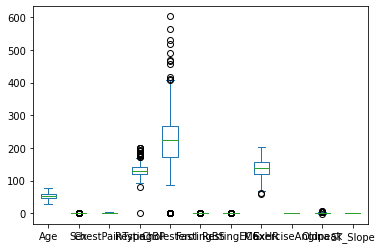

In [30]:
all_data.plot.box()

In [31]:
heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


### Model Training

In [32]:
train_features = all_data
train_labels = heart_labels

In [33]:
from sklearn.model_selection import train_test_split
train_features, val_features, train_labels, val_labels = train_test_split(train_features, 
                                                                          train_labels, 
                                                                          test_size=0.2, 
                                                                          random_state=42, 
                                                                          stratify=train_labels)

In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
classifier = RandomForestClassifier(max_depth=3, n_estimators=10)

In [36]:
classifier.fit(train_features, train_labels)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [37]:
classifier.score(train_features, train_labels)

0.8637602179836512

In [38]:
classifier.score(val_features, val_labels)

0.8369565217391305

### Model Evaluation

In [39]:
predictions = classifier.predict(val_features)

In [40]:
from sklearn import metrics

In [41]:
accuracy = metrics.accuracy_score(val_labels, predictions, )
precision, recall, fscore, support = metrics.precision_recall_fscore_support(val_labels, predictions, average='binary')

In [42]:
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {fscore:.2f}")

Accuracy: 0.84, Precision: 0.81, Recall: 0.92, F1-Score: 0.86


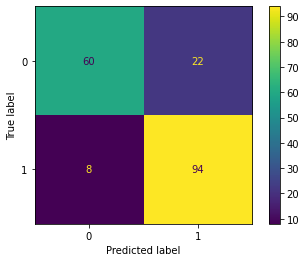

In [43]:
confusion_matrix = metrics.confusion_matrix(val_labels, predictions, )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

### Examining Feature Importance

When we train a model, we can take a peek into understanding the predictions using feature importances for this model.

Feature importances are values which give us an idea about which features are given more weightage by the model while giving an output.

In [44]:
pd.DataFrame([train_features.columns.tolist(), classifier.feature_importances_.tolist()]).T

,0,1
0,Age,0.001105
1,Sex,0.009265
2,ChestPainType,0.059601
3,RestingBP,0.002959
4,Cholesterol,0.088889
5,FastingBS,0.012297
6,RestingECG,0.00176
7,MaxHR,0.108431
8,ExerciseAngina,0.189877
9,Oldpeak,0.089163


Here, we can observe that `ChestPainType`, `ST_Slope`, and `ExerciseAngina` are the most important features as identified by the random forest model during training